# Population Simulation: Type 1 Diabetes
Timothy Novak and Maia Materman

The following section of code recreates the population model from the ModSim Notebooks. This code is here primarily for reference.

Saving figure to file chap04-fig01.pdf


7.6546433958074465

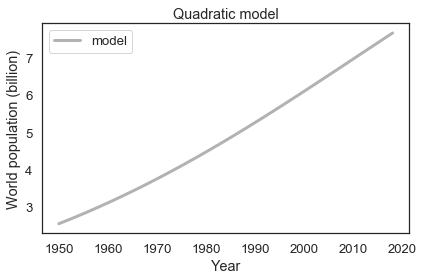

In [36]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import code libraries
from modsim import *
import random
import math

from pandas import read_html
def plot_results(timeseries, title):
    """Plot the estimates and the model.
    
    census: TimeSeries of population estimates
    un: TimeSeries of population estimates
    timeseries: TimeSeries of simulation results
    title: string
    """

    plot(timeseries, color='gray', label='model')
    
    decorate(xlabel='Year', 
             ylabel='World population (billion)',
             title=title)
def run_simulation(system, update_func):
    """Simulate the system using any update function.
    
    system: System object
    update_func: function that computes the population next year
    
    returns: TimeSeries
    """
    results = TimeSeries()
    results[system.t_0] = system.p_0
    
    for t in linrange(system.t_0, system.t_end):
        results[t+1] = update_func(results[t], t, system)
        
    return results

def update_func_quad(pop, t, system):
    """Update population based on a quadratic model.
    
    pop: current population in billions
    t: what year it is
    system: system object with model parameters
    """
    net_growth = system.alpha * pop + system.beta * pop**2
    return pop + net_growth

population_growth_system = System(t_0=1950, 
                t_end=2018,
                p_0=2.557628654,
                alpha=0.025,
                beta=-0.0018)
population_growth_results = run_simulation(population_growth_system, update_func_quad)
plot_results(population_growth_results, 'Quadratic model')
savefig('chap04-fig01.pdf')
population_growth_results[population_growth_system.t_end]

## Motivating Question:
What is the percent of the population which will have type 1 diabetes in 100 years?

However, this question is a little bit difficult to find data on, so we specified it a little.

## New Motivating Question

What is the percent population of the Austrian population which will have type 1 diabetes in 100 years?

We selected Austria because Austria is one of the few countries in the world with comprehensive records on their type 1 diabetic population over the last 30 years.


## Calibrating Population Growth Model to the Desired Population
The population model can be hand calibrated to represent Austria's population. This means that we first need to create a population vs time graph.

In [37]:
#innitializes the timeseries with the population data on the Austrian population
austrian_pop = TimeSeries()
austrian_pop[1923] = 6534742
austrian_pop[1934] = 6760044
austrian_pop[1939] = 6652567
austrian_pop[1951] = 6933905
austrian_pop[1961] = 7073807
austrian_pop[1971] = 7491526
austrian_pop[1981] = 7555338
austrian_pop[1991] = 7795786
austrian_pop[1997] = 8072000
austrian_pop[2001] = 8032587
austrian_pop[2011] = 8401940
austrian_pop[2018] = 8823054

Now that we have our original data stored in a series, we can create a scatter plot of our data.

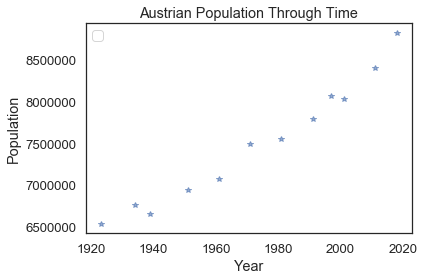

In [38]:
#plots the data
plot(austrian_pop, "*")
#decorates the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")

We can add the logistic population growth model to the data (the logistic regression was found by hand).

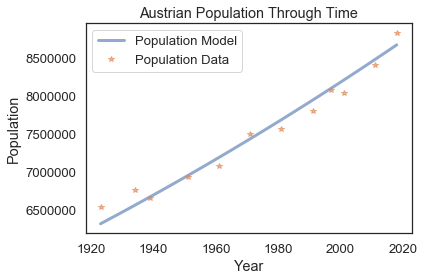

In [39]:
#this is the update function and formula from the chapter 7 notebook
def update_func_quad1(pop, t, system):
    """Compute the population next year with a quadratic model with the carrying capacity parameterization.
    
    pop: current population
    t: current year
    system: system object containing parameters of the model
    
    returns: population next year
    """
    #applies the model to calculate the change in population
    net_growth = pop*system.max_rate*(1- pop/system.carrying_capacity)
    #returns the new population
    return pop + net_growth

#defines a new system which holds relevant parameters for this model coefficents were found by hand
austrian_population_model_sys = System(t_0=1923, 
                t_end=2018,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values embedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plots the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorates the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")
#adds a legend to the graph
legend()

Since we will use this later, we will store the equation as a function. That way we can estimate population values based on this equation.

In [40]:
def Logistic_population_model (year, system):
    #This function takes in a year and parameter data and will return a population in that year based on the logistic growth model
    #returns the population in the desired year
    return system.carrying_capacity/(1+(system.carrying_capacity-system.p_0)/system.p_0*exp(-system.max_rate*year))

## Projecting the Data into the Future
To answer the motivating question we have to know where the population of Austria will be in 100 years. To estimate, we can project our newly calibrated curve 100 years into the future.

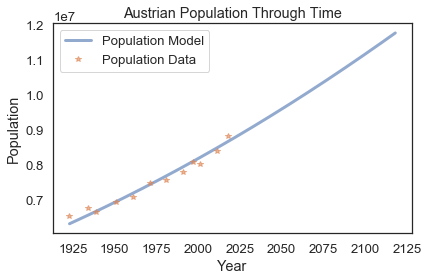

In [41]:
#defines a new system which holds relevant parameters for this model and an end date projected into the future
austrian_population_model_sys = System(t_0=1923, 
                t_end=2118,
                p_0=austrian_pop[1923]-220000,
                max_rate = .0041,
                carrying_capacity = 40000000)
#runs a simulation to generate model data using the values embedded in the system
results = run_simulation(austrian_population_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plots the original population data
plot(austrian_pop, "*", label = "Population Data")
#decorates the plot
decorate(title = "Austrian Population Through Time",
         xlabel = "Year",
         ylabel = "Population")
#adds a legend to the graph
legend()

## Let's Do It Again for the Population of Austrians with Type 1 Diabetes
We can now take the data for the number of Austrians with type 1 diabetes and fit another population curve to it.

Here is the population data of individuals with the disorder.

In [42]:
#initializes time series which stores population data on the total number of people with the genetic disorder
sick_pop = TimeSeries()
sick_pop[1991] = austrian_pop[1991]*9/100000
sick_pop[1997] = austrian_pop[1997]*9.9/100000
sick_pop[2003] = austrian_pop[2001]*13.3/100000

We now need to plot this data.


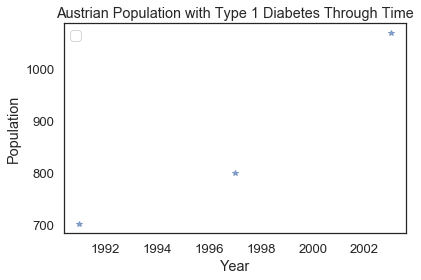

In [43]:
#plots the data
plot(sick_pop, "*")
#decorates the plot
decorate(title = "Austrian Population with Type 1 Diabetes Through Time",
         xlabel = "Year",
         ylabel = "Population")

With this information, we can fit the population curve.

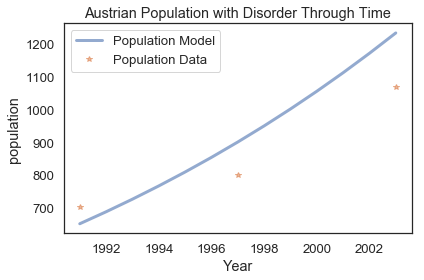

In [44]:
#defines a new system which holds relevant parameters for this model coefficents were found by hand

austrian_population_diabetes_model_sys = System(t_0=1991, 
                t_end=2003,
                p_0=sick_pop[1991]-50,
                max_rate = .06,
                carrying_capacity = 10000)
#runs a simulation to generate model data using the values embedded in the system
results = run_simulation(austrian_population_diabetes_model_sys, update_func_quad1)
#plots the results
plot(results, label = "Population Model")
#plots the original population data
plot(sick_pop, "*", label = "Population Data")
#decorates the plot
decorate(title = "Austrian Population with Disorder Through Time",
         xlabel = "Year",
         ylabel = "population")
#adds a legend to the graph
legend()

We now must adjust our system to project our results further in time.

In [45]:
#TODO

## Calculating the Percent of the Population which has the Disorder
Our model metric is the percent of the population who have type 1 diabetes. This allows us to compress all of our analysis into one number. We can calculate this by dividing the population of individuals with the disorder by the total population.

In [46]:
percent_sick_population = TimeSeries()
#change this code to reference the first & last indexes of the data
for counter in linrange(1980,2100,1):
    percent_sick_population[counter] = 100* Logistic_population_model(counter,austrian_population_diabetes_model_sys)/Logistic_population_model(counter,austrian_population_model_sys)

Now we can plot the results over time.

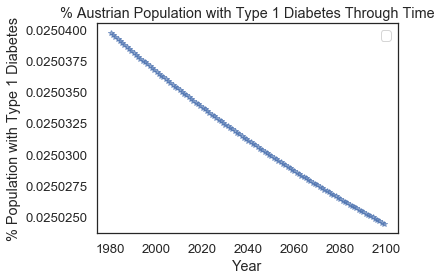

In [47]:
#plots the data
plot(percent_sick_population, "*")
#decorates the plot
decorate(title = "% Austrian Population with Type 1 Diabetes Through Time",
         xlabel = "Year",
         ylabel = "% Population with Type 1 Diabetes")

At this point, we can answer our motivating question!

What is the percent of the population which is infected with type 1 diabetes 100 years in the future?

In [48]:
print(100* Logistic_population_model(2118,austrian_population_diabetes_model_sys)/Logistic_population_model(2118,austrian_population_model_sys))
print("percent")

0.025022578643859882
percent


So we're done right? Well that was a bit boring wasn't it? So we will make another simulation which is more "real".

## A Newer and Better Model
For our next model we are going to simulate a population by treating it as though it is made of individual people. What this means is that our new model will simulate disorder propogation by breeding people and killing people during each time step. We will also keep track of the number of individuals with the disorder as dictated by genetic precentages for its transmission.

A newer and better question:
Are genetic factors suficent to explain the recent increase in percent population with type 1 diabeties?

### Initial Conditions and System Variable Set Up
We first need to look at initial conditions and system inputs.

In [49]:
#Initialize System with various transmission percentages and inital populations of type 1 diabetics, carrying and neutral individuals
system = System(initpop = 6236068, percent_safe_pop =.9653 , percent_carry_pop =.0345, percent_sick_pop = .0002, death_rate = .0074, year = 2018)
state = State(sickcounter = 0)
#create 2d array of transmission rates
#the output array is as follows
#   MM  Mm  mm
#FF.01 .01 .10
#Ff.01 .02 .10
#ff.04 .04 .14
transmission_rates = [[.01,.01,.1],[.01,.02,.1],[.04,.04,.14]]

[[0.01, 0.01, 0.1], [0.01, 0.02, 0.1], [0.04, 0.04, 0.14]]

### Setting Up the Initial Populations
We will take the each of the initial populations of the group and divide them into two groups on the basis of sex. One is made to represent males and the other is made to represent females. Interestingly enough, the propagation rates of the disorder vary by sex of the parents.

We will now assign each human one of three states:

0: A person who does not have any of the transmission genes 

1: A person who is a carrier of the disorder but does not have it 

2: A person who has the disorder

In [50]:
#create arrays of people
female = []
male = []
import math
#divide relative populations by two to find the number of males and females for each group then divide by 100,000 so that each person in the array is representative of 100,000 people
for i in range(math.ceil((system.initpop * system.percent_safe_pop)/2/100000)):
    female.append(0)
    male.append(0)
for j in range(math.ceil((system.initpop* system.percent_carry_pop)/2/100000)):
    female.append(1)
    male.append(1)
for k in range(math.ceil((system.initpop* system.percent_sick_pop)/2/100000)):
    female.append(2)
    male.append(2)
    state.sickcounter += 2

It is important to note that to conserve memory and time when running simulations, each 'person' in the arrays is representative of 100,000 people.
When we start accounting for deaths, it will be important that the arrays are randomized.

In [51]:
#scramble the arrays
random.shuffle(female)
random.shuffle(male)

### Breeding Algorithm
For each time step we will need to breed our population. For this reason, we need to create a breeding algorithm. We will assume that each male has an equal chance of being paired with any female. So we will start by picking a random male and a random female.

In [52]:
#generate a random male and a random female
randommale = male[random.randint(0,len(male))]
randomfemale = female[random.randint(0,len(female))]

0

Now, we will mate the individuals. We assume that one person will be formed from every couple. We then use the flip function to determine whether the child has the disorder, is a carrier, or has no relation to the disorder. We found the values which we put in our flip function from research on type 1 diabetes. We also assume that there is an equal probability of the child being either male or female.

In [53]:
#generate a child and assign a trait to it and append it to the relevant array
print(female,male)
child = 0
#apply transmission rates
if flip(transmission_rates[randomfemale][randommale]):
    child = 2
    system.sick_pop += 1
elif flip(system.percent_carry_pop):
    child = 1
else:
    child = 0
#assign sex
if flip(.5):
    female.append(child)
else:
    male.append(child)
print(female, male)
print (results[2000])

[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1055.931861977105


That breeding function is the heart of our model. At this point, it makes sense to encapsulate it into a mate function.

In [54]:
#encapsulate the code above into a function
def mate (system, state, male, female, transmission_rates):
    "This function performs a random mating algorithm which mates one male and one female. It takes a system variable which stores percent carrying rate for a genitic disorder. male and female are arrays which store the population of males and females in the simulation. Transmission rates is a 3X3 matrix which holds the relative propagation rates of various pairings of parents"
    #generate a random male and a random female
    randommale = male[random.randint(0,len(male)-1)]
    randomfemale = female[random.randint(0,len(female)-1)]
    #generate a child and assign a trait to it and append it to the relevant array
    print(female, male)
    child = 0
    #apply the transmission rates
    if flip(transmission_rates[randomfemale][randommale]):
        child = 2
        state.sick_pop += 1
    elif flip(system.percent_carry_pop):
        child = 1
    else:
        child = 0
    #make sex
    if flip(.5):
        female.append(child)
    else:
        male.append(child)

### Time Step
Now we can start making our update function that gets run every time step. At the start of our time step we want to generate a number of babies which correlates to the growth rate of the population.

In [55]:
growthrate = .01
#make a loop which generates a number of kids by running it in proportion to the growthrate + death rate
for growthcounter in range(math.ceil((growthrate + system.death_rate)*(len(male)+len(female)))):
    
    #perform breeding algorithm
    mate (system, state, male, female, transmission_rates)


[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1] [0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0] [0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Before we go on, it is important to note that in the previous code, we generate children equal to the growth rate + the death rate because the growth rate is actually the net growth rate (living people - dead people). This is necessary to consider when we make new people.

Although this seems good it this falls into the problem that our very first model of population this semester fell into: it assumes a constant growth rate. For this reason, we need to write another function which retrieves a growth rate from our total Austrian population model created earlier.

In [56]:
#Growth rate retrieval function
def retrieverate(year, results, population_growth_system):
    "this model takes in the results from the original population model and the curent year and will return the net growth rate between the supplied year and the previous year."
    #checks if it is the first year in the series
    if year == population_growth_system.t_0 or year > population_growth_system.t_end:
        #returns a null condition that signifies that an invalid year was inputted
         return 0
    #if it is a valid year
    elif year <= population_growth_system.t_end:
        #returns the net growth from the previous year
        return (results[year]- results[year-1])
    else:
        return 0
   

Now that we are here, there is just one more idea we need to account for in our time step: the fact that people that die off. We need to kill off people in the population according to what the death rate predicts.

In [57]:
#loops through the death rate
for deathcounter in range(math.ceil(system.death_rate*(len(female)+len(male))/2)):
#if the member to be deleted is one with type 1 diabetes
    if female[0] == 2:
        state.sickcounter -= 1
    if male[0] == 2:
        state.sickcounter -= 1
#deletes the first instance of each array
    del female[0]
    del male[0]

You might notice that we are handling these deaths in an odd way, by explicitly killing off the people from the begining of the array. This is because it creates population turn over. New babies are added to one end of the array and the other end of the array has the old die off. This then means that as a baby gets older it will get cycled through the array untill it dies at the other end.This keeps the population from becoming stagnant when the growth rate lessens towards the carrying capacity.

Well we can now calculate the percent of the population which has the disorder by dividing the number of diabetic individuals by the total population found as the sum of the male and female arrays. We can also encapsulate the function at the end of this into an update function.

In [65]:
#make the percent population calculation and print it
print("percent = " + str(math.ceil((state.sickcounter/(len(male)+len(female)))*100)))

#Encapsulate everything into an update function
def update(system, year, population_growth_system, population_growth_results):
    gr = retrieverate(year, population_growth_results, population_growth_system)
    #print("test" + str(retrieverate(year), str(population_growth_results), str(population_growth_system))
    
    for gr in range(0, math.ceil((gr + system.death_rate) * (len(male) + len(female)))):
        mate(system, state, male, female, transmission_rates)
            
    for deathcounter in range(math.ceil(system.death_rate*(len(female)+len(male))/2)):
        #if the member to be deleted is one with type 1 diabetes
        if female[0] == 2:
            state.sickcounter -= 1
        if male[0] == 2:
            state.sickcounter -= 1
        #deletes the first instance of each array
        del female[0]
        del male[0]
    system.year = year +1
update(system, system.year, population_growth_system, population_growth_results)

percent = 3
[0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0] [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Run simulation
We can now make a pretty standard run simulation function which retuns a time series of percent populations

In [69]:
#Run simulation function which retuns a time Series
def run_sim(system, update):
    f = TimeSeries()
        
    for t in linrange(system.year, 2118):
        f[t+1] = update(system, f[t], population_growth_system, population_growth_results)
        
    return f

### Results
We can now get some results. We can plot the percent population which is diabetic over time.

In [70]:
#Plots of percent diabetic over time
plot(run_sim(system, update))

IndexError: index out of bounds

We can also calculate the answer to our motivating question.

In [61]:
#calculate the answer to the motivating question
#TODO

### Comaprason of data and results
An interesting result of having made two different models is that we can compare them against each other.

In [62]:
#Comparason stuffs
#Todo

### Interpretation
Let's Interpret things!

In [63]:
#interpretation
#TODO